In [6]:
from plot_resistograph_data import (
    read_nodes, 
    read_resistograph_data, 
    add_resistograph_data, 
    add_scale, 
    add_resistograph_graphs, 
    add_all_scales_along_path
)
import matplotlib.pyplot as plt

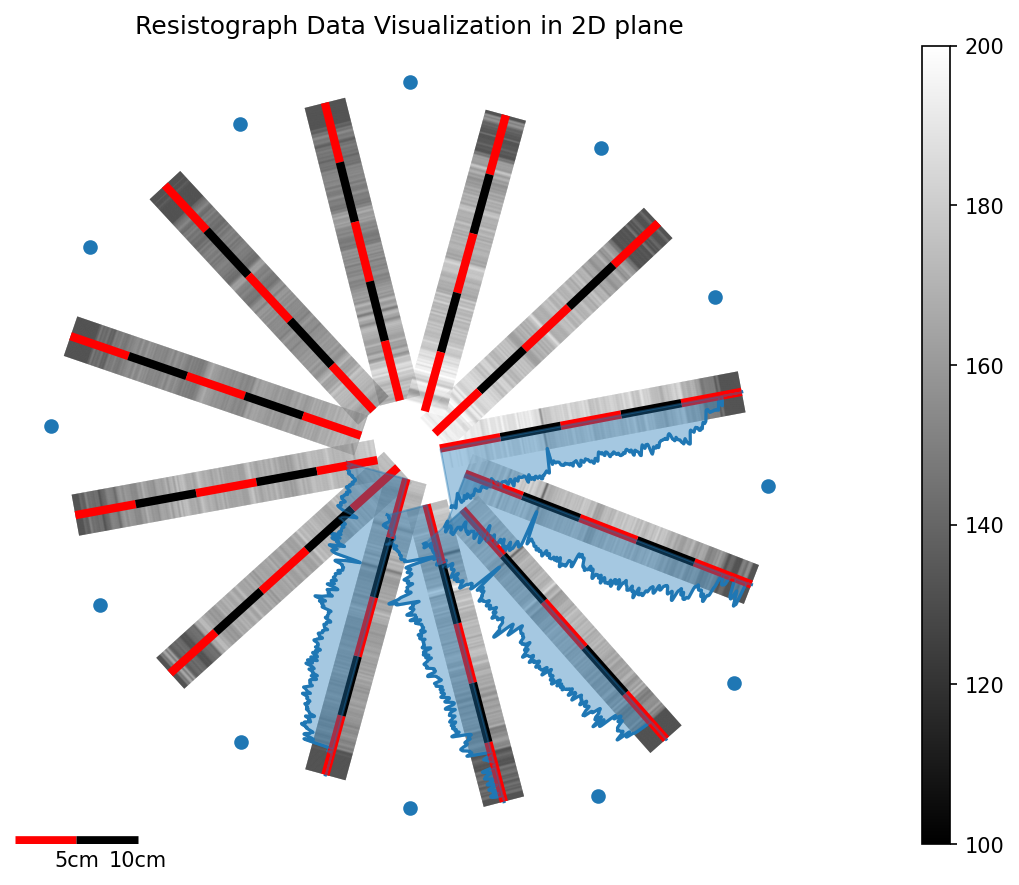

In [8]:
# Setup parameters
data_dir = "data/"
settings_filter = {
    'window_length': 301,
    'polyorder': 3,
    'upper_limit': 250
}
settings_plot = {
    'min': 100,
    'max': 200,
    'step': 10,
    'linewidth': 20,
    'cmap': 'gray'
}
scale_length = 250

# Read data
# Note: Adjust the data_dir and settings as needed for your specific use case
resistograph_df = read_resistograph_data(data_dir, **settings_filter)
nodes_df = read_nodes(data_dir)

# Plotting nodes, resistograph data, and scale
# set higher DPI for better resolution
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
fig, [ax, cax] = plt.subplots(1, 2, figsize=(8, 6), gridspec_kw={'width_ratios': [40, 1]})
ax.plot(nodes_df['x'], nodes_df['y'], 'o')
add_resistograph_data(resistograph_df, nodes_df, ax, cax, **settings_plot)
add_resistograph_graphs(resistograph_df.loc[:,[6,7,8,9,10]], nodes_df, ax)
add_all_scales_along_path(ax, resistograph_df.columns, nodes_df, scale_length)
add_scale(ax)

# Final adjustments
ax.set_title('Resistograph Data Visualization in 2D plane')
ax.set_aspect(1)
plt.tight_layout()
fig.savefig("fig1.png")
plt.show()



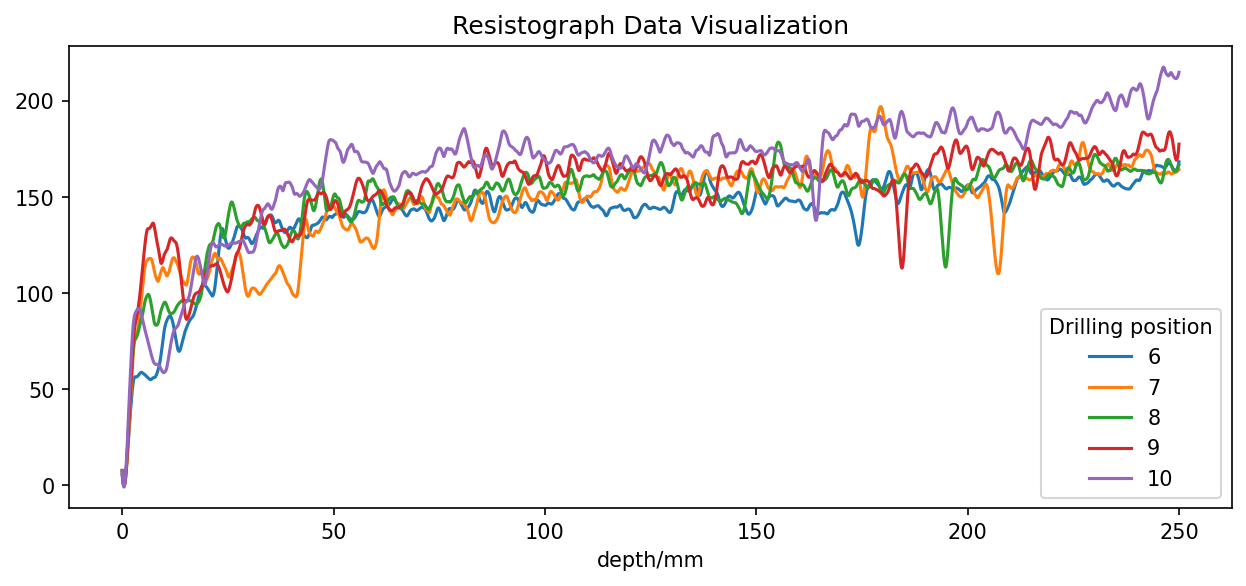

In [6]:
plotly_settings = {'backend': 'plotly', 
    'labels': {'value': 'Resistograph Value'},
    'width': 800, 'height': 600}
# plot selected columns
# uncomment the plotly_settings dictionary to get interactive plot
fig, ax = plt.subplots(figsize=(10,4))
(resistograph_df
    #.loc[100:250]
    #.iloc[::10]
    .loc[:,[6,7,8,9,10]].plot(title='Resistograph Data Visualization', ax=ax
    # **plotly_settings
)
)
plt.legend(title="Drilling position")
plt.savefig("fig0.png")

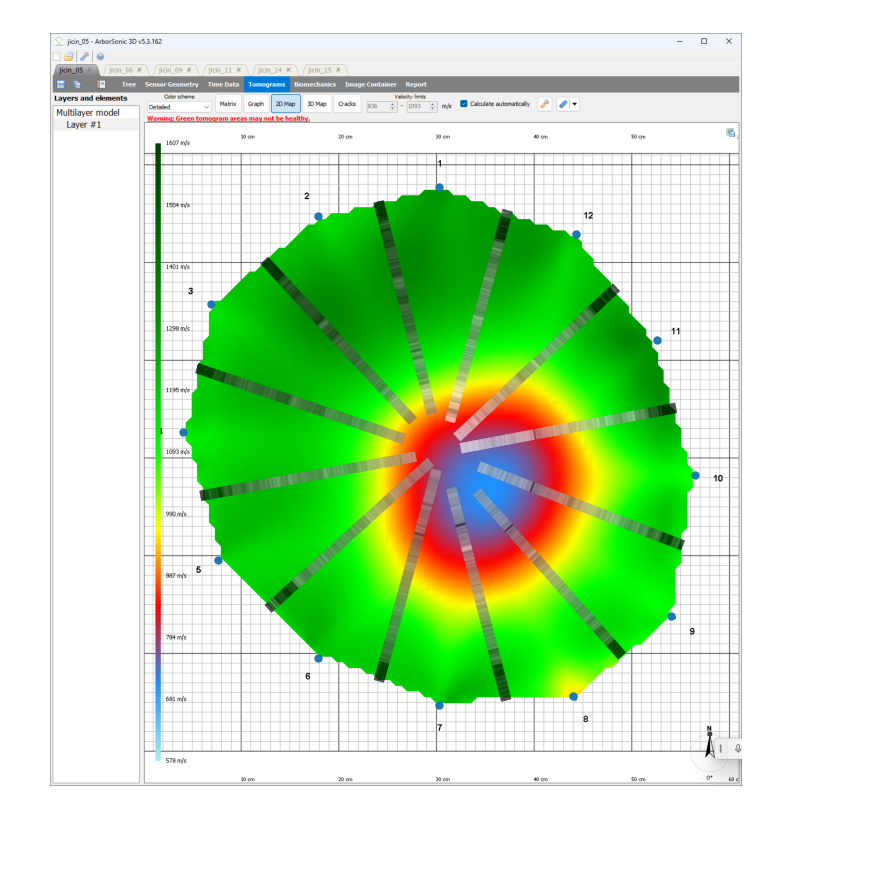

In [7]:
from transform_image import transform_image
import matplotlib.image as mpimg
import numpy as np

fig, [ax, cax] = plt.subplots(1, 2, figsize=(8, 6), gridspec_kw={'width_ratios': [40, 1]})
ax.plot(nodes_df['x'], nodes_df['y'], '.')
overlay_settings_plot = settings_plot.copy()
overlay_settings_plot['linewidth'] = 5
add_resistograph_data(resistograph_df, nodes_df, ax, cax, **overlay_settings_plot)
cax.remove()

A_img = np.array([721, 282])
B_img = np.array([721, 1241])
A_target = nodes_df.values[0]
B_target = nodes_df.values[6]

overlay = mpimg.imread(f'data/05.png')

# Uložení rozsahu os
xlim = ax.get_xlim()
ylim = ax.get_ylim()

transform = transform_image(overlay, ax, A_img, B_img, A_target, B_target, plot_image=False)
ax.imshow(overlay, transform=transform + ax.transData, alpha=1, zorder=-500)


# Nastavení uložených rozsahů os
ax.set_xlim(np.array(xlim)*1.5)
ax.set_ylim(np.array(ylim)*1.5)
        

# Final adjustments
ax.set_aspect(1)
plt.tight_layout()
plt.show()

In [8]:
resistograph_df[::100]


position,1,2,3,4,5,6,7,8,9,10,11,12
depth/mm,,,,,,,,,,,,
0.0,-5.967316,-2.609441,2.690906,6.365318,7.934048,5.191905,6.820496,7.861433,7.554415,7.572221,5.209016,3.652612
1.0,9.900752,8.183987,7.118385,7.172514,13.737336,9.541342,7.996577,9.656213,9.559673,12.443615,20.366088,22.841552
2.0,12.365049,21.964206,29.355860,40.942127,66.513585,39.470317,44.346274,50.663377,50.576763,60.621402,79.316535,87.737199
3.0,36.959379,57.364476,56.773776,70.989039,95.084262,56.473876,76.029820,75.685963,82.605436,88.960529,103.358473,124.509206
4.0,51.207621,73.326177,55.916629,75.086687,112.845306,57.727287,85.605444,81.769592,95.732489,91.959661,115.542016,137.946953
...,...,...,...,...,...,...,...,...,...,...,...,...
246.0,157.484422,144.171194,156.899451,167.554335,161.658606,165.773697,162.585225,158.317427,174.476320,216.101551,192.525899,207.325577
247.0,149.354512,146.596465,157.608720,172.963320,163.764087,166.154366,162.274244,168.464177,177.778165,214.273122,196.328173,225.616272
248.0,152.625931,148.841829,161.739428,174.371102,165.361694,167.083696,162.214398,167.575458,183.450265,214.731126,196.390773,238.973131
